In [31]:
import os
import warnings
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

warnings.filterwarnings("ignore")

# For better visualizations
sns.set_theme(style="ticks", palette="muted", color_codes=True)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.weight'] = 'bold'

from wordcloud import WordCloud

In [55]:
dataset="datasets/reddit_posts_with_topics_keywords.csv"

df = (
    pd.read_csv(dataset)
    .rename(columns={'body_keywords' : 'keywords'})
)
df.head()

,post_id,title,timestamp,body,body_type,topic_name,cleaned_text,keywords
0,1b0m6c1,r/CasualConversation is looking for new modera...,2024-02-26 16:48:14,"Hello everyone,It's that time again, [we're lo...",post,22_subs_subreddits_trolls_subreddit,hello everyone time look new mod join team doc...,"modmail courteous,process hang,account year"
1,1b5h6x7,Deleting social media was one of the best thin...,2024-03-03 13:29:12,I know that technically reddit is a social med...,post,1_fb_deleted_instagram_facebook,know technically reddit social medium not nega...,"delete social,health fact,tiktok honestly"
2,1b5lu9j,Lonlieness is not about gender! My Opinion.,2024-03-03 16:56:09,Okay so I just wanted to get this off of my mi...,post,359_loneliness_lonely_epidemic_intiate,okay want get mind keep see people post man lo...,"loneliness affect,expect man,factor specific"
3,1b5jo0m,Have you gave up any hobbies?,2024-03-03 15:23:08,I used to be a doll collector. Then when I was...,post,-1_breakfast_cream_listening_bus,use doll collector tell weird old donate every...,"doll collector,happy donate,like logical"
4,1b5c8ah,Is it me or has the world just stopped moving ...,2024-03-03 08:24:06,"This is strange, but I feel like:1) I don’t re...",post,-1_breakfast_cream_listening_bus,strange feel like not remember anything happen...,"year covid,strange feel,stop reopen"


In [56]:
(
    df['topic_name'].value_counts()
    .nlargest(25)
)

topic_name
-1_breakfast_cream_listening_bus        52156
0_attacks_prescribed_symptoms_benzos     2555
1_fb_deleted_instagram_facebook          1490
2_nicotine_cigarette_smoked_smoker        953
3_bday_birthdays_25th_belated             940
4_masks_vaccinated_mask_wearing           867
5_cats_cat_kitty_kitties                  740
6_pete_stories_casconvo_sharing           648
7_removed_backspaced_bailing_erased       572
8_grammar_native_english_language         565
9_dreamt_dreaming_dreamed_dreams          554
10_crying_tear_cry_tears                  515
11_bully_bullied_bullies_bullying         496
12_upvote_upvotes_upvoted_downvotes       481
13_bachelors_bachelor_diploma_ged         481
14_channel_subreddit_sub_lego             469
15_teens_30s_20s_aging                    461
16_savings_invest_401k_saving             444
17_pregnancy_adoption_pregnant_adopt      412
18_bald_shaved_shave_shaving              405
19_dads_fathers_father_dadding            399
20_cloudy_gloomy_rain_s

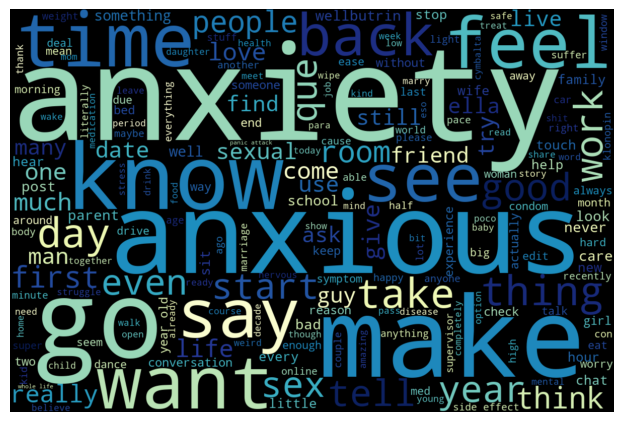

In [82]:
# i=12

text_data = (
    df.loc[lambda x: x['body_type'].eq('post')]
    .loc[lambda x: x['cleaned_text'].str.contains('sex'), 'cleaned_text']
    # .replace(" ", "_", regex=True)
    # .replace(",", " ", regex=True)
    .str.cat(sep=" ")
)

fig, ax = plt.subplots(tight_layout=True)

wordcloud = WordCloud(width=1200,
                      height=800,
                      colormap='YlGnBu', 
                      background_color="black").generate(text_data)

ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")
ax.grid(None);